### For the best experience, view this notebook on nbviewer:
[Open in nbviewer](https://nbviewer.org/github/ArturKosma/Learning/blob/main/jupyter/ai_for_games/exercises_3.19.ipynb)

In [4]:
import leqanimlib
import leqmath
import numpy as np

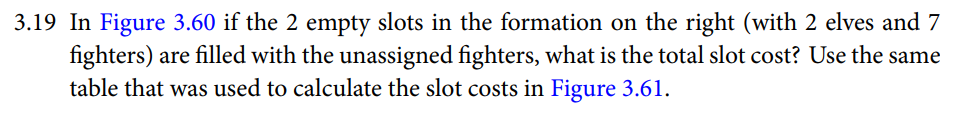

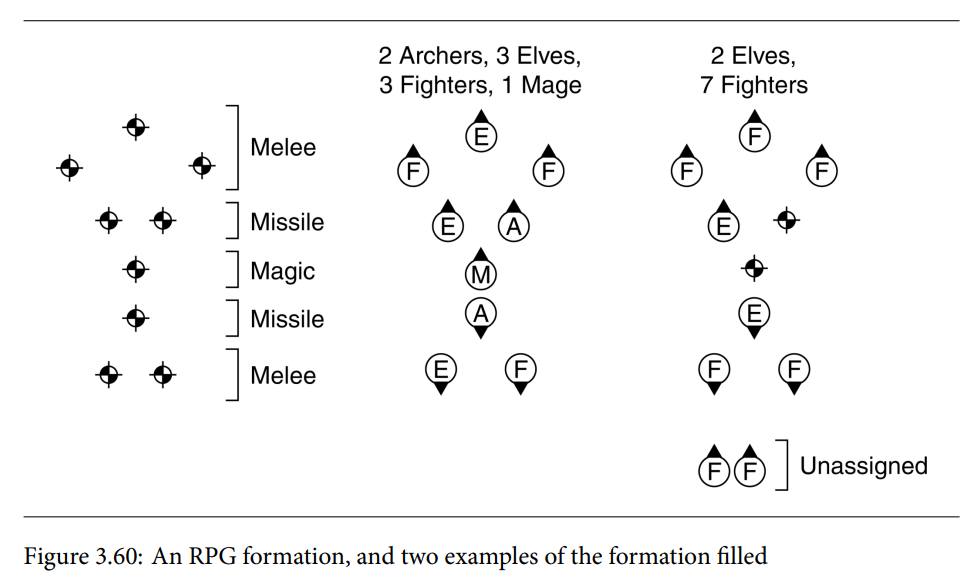

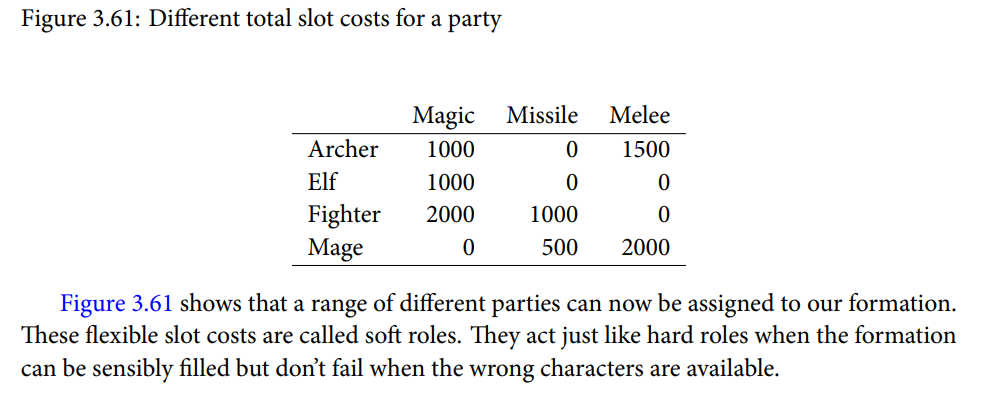

The answer would be 3000. Those two slots are for Magic and Missile, for whom Fighter has 2000 and 1000.

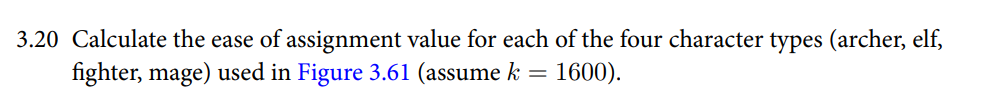

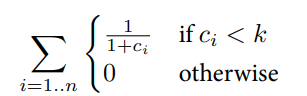

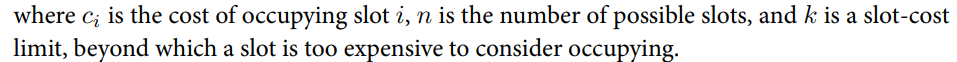

In [25]:
class Slot:

    def __init__(self, slot_type):
        self.slot_type = slot_type

class Character:

    def __init__(self, character_type):
        self.costs = np.array([])
        if character_type == 'archer':
            self.costs = np.array([1000, 0, 1500]) 
        if character_type == 'elf':
            self.costs = np.array([1000, 0, 0])
        if character_type == 'fighter':
            self.costs = np.array([2000, 1000, 0])
        if character_type == 'mage':
            self.costs = np.array([0, 500, 2000])

In [27]:
def calc_ease_of_assignment(character, slots, k):
    ease = 0
    for slot in slots:
        cost_of_this_slot = character.costs[slot.slot_type]
        if cost_of_this_slot < k:
            ease += (1 / (1 + cost_of_this_slot))
    return ease

In [28]:
# Create slots.
slots = []
for i in range(1):
    magic_slot = Slot(0) 
    slots.append(magic_slot)
for i in range(3):
    missile_slot = Slot(1) 
    slots.append(missile_slot)
for i in range(5):
    melee_slot = Slot(2) 
    slots.append(melee_slot)

# Create characters.
archer = Character('archer')
elf = Character('elf')
fighter = Character('fighter')
mage = Character('mage')

# Max cost.
k = 1600

In [29]:
print(f'archer: {calc_ease_of_assignment(archer, slots, k)}')
print(f'elf: {calc_ease_of_assignment(elf, slots, k)}')
print(f'fighter: {calc_ease_of_assignment(fighter, slots, k)}')
print(f'mage: {calc_ease_of_assignment(mage, slots, k)}')

archer: 3.0043301135906058
elf: 8.000999000999002
fighter: 5.002997002997003
mage: 1.005988023952096


Having this, we can start by putting the least flexible characters into slots first. We still need to sort slots for each character. This will form a nice heuristic algorithm, which simply puts every character to the cheapest slot, starting with the least flexible characters.